In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.metrics import Results


### Funções auxiliares

In [2]:
def load_metrics(model_name):
    with open(f'metrics/{model_name}_metrics.npy', 'rb') as f:
        acc = np.load(f, allow_pickle=True)
        f1 = np.load(f, allow_pickle=True)
        cm = np.load(f, allow_pickle=True)
        roc = np.load(f, allow_pickle=True)
        # grid_results = np.load(f, allow_pickle=True)
    return acc, f1, cm, roc #, grid_results

In [29]:
def plot_box(dfs, metrics):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    for i in [0,1]:
        axs[i].boxplot(dfs[i].values)
        axs[i].set_xticklabels(dfs[i].columns)
        axs[i].set_title(f'{metrics[i]} (10-Fold CV)')
        axs[i].set_xlabel('Modelos')
        axs[i].set_ylabel(metrics[i])

    fig.suptitle('Boxplots das Métricas')
    fig.tight_layout()

    plt.show()

def plot_cms(cm_list, models_name):
    fig, axs = plt.subplots(2, 3, figsize=(16,8))
    # Confusion Matrix
    for idx in range(6):
        cm_mean = np.mean(cm_list[idx], axis=0)
        axs[idx//3, idx%3] = sns.heatmap(cm_mean, linewidths=0.5, annot=True, fmt='g', ax=axs[idx//3, idx%3], cmap = sns.cm.rocket_r)
        axs[idx//3, idx%3].set_yticklabels(axs[idx//3, idx%3].get_yticklabels(), rotation=0)
        axs[idx//3, idx%3].set_title(f'{models_name[idx]}')
        axs[idx//3, idx%3].set_xlabel('Classes preditas')
        axs[idx//3, idx%3].set_ylabel('Classes verdadeiras')

    fig.suptitle('Matrizes de Confusão Média (10-Fold CV)')
    fig.tight_layout()
    
    plt.show()

# Análise dos Modelos

Carregando as métricas

In [4]:
dt_acc, dt_f1, dt_cm, dt_roc = load_metrics('DecisionTreeClassifier')
gnb_acc, gnb_f1, gnb_cm, gnb_roc = load_metrics('GaussianNB')
mnb_acc, mnb_f1, mnb_cm, mnb_roc = load_metrics('MultinomialNB')
mlp_acc, mlp_f1, mlp_cm, mlp_roc = load_metrics('MLP')
knn_acc, knn_f1, knn_cm, knn_roc = load_metrics('KNeighborsClassifier')
svc_acc, svc_f1, svc_cm, svc_roc = load_metrics('SVC')

### DataFrames

In [5]:
acc_df = pd.DataFrame(
    data={
        'DT': dt_acc,
        'GNB': gnb_acc,
        'MNB': mnb_acc,
        'MLP': mlp_acc,
        'KNN': knn_acc,
        'SVC': svc_acc,
    }
)
fscore_df = pd.DataFrame(
    data={
        'DT': dt_f1,
        'GNB': gnb_f1,
        'MNB': mnb_f1,
        'MLP': mlp_f1,
        'KNN': knn_f1,
        'SVC': svc_f1,
    }
)

# Plots

### DT

Resumo das métricas do modelo DecisionTreeClassifier

Accurácia média (desvio): 0.749 (0.027)
F1-Score média (desvio): 0.746 (0.029)


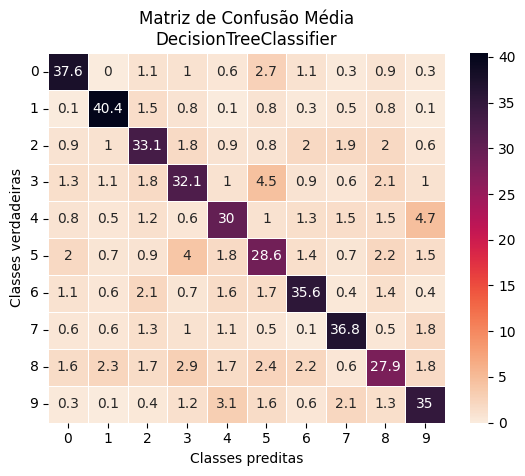

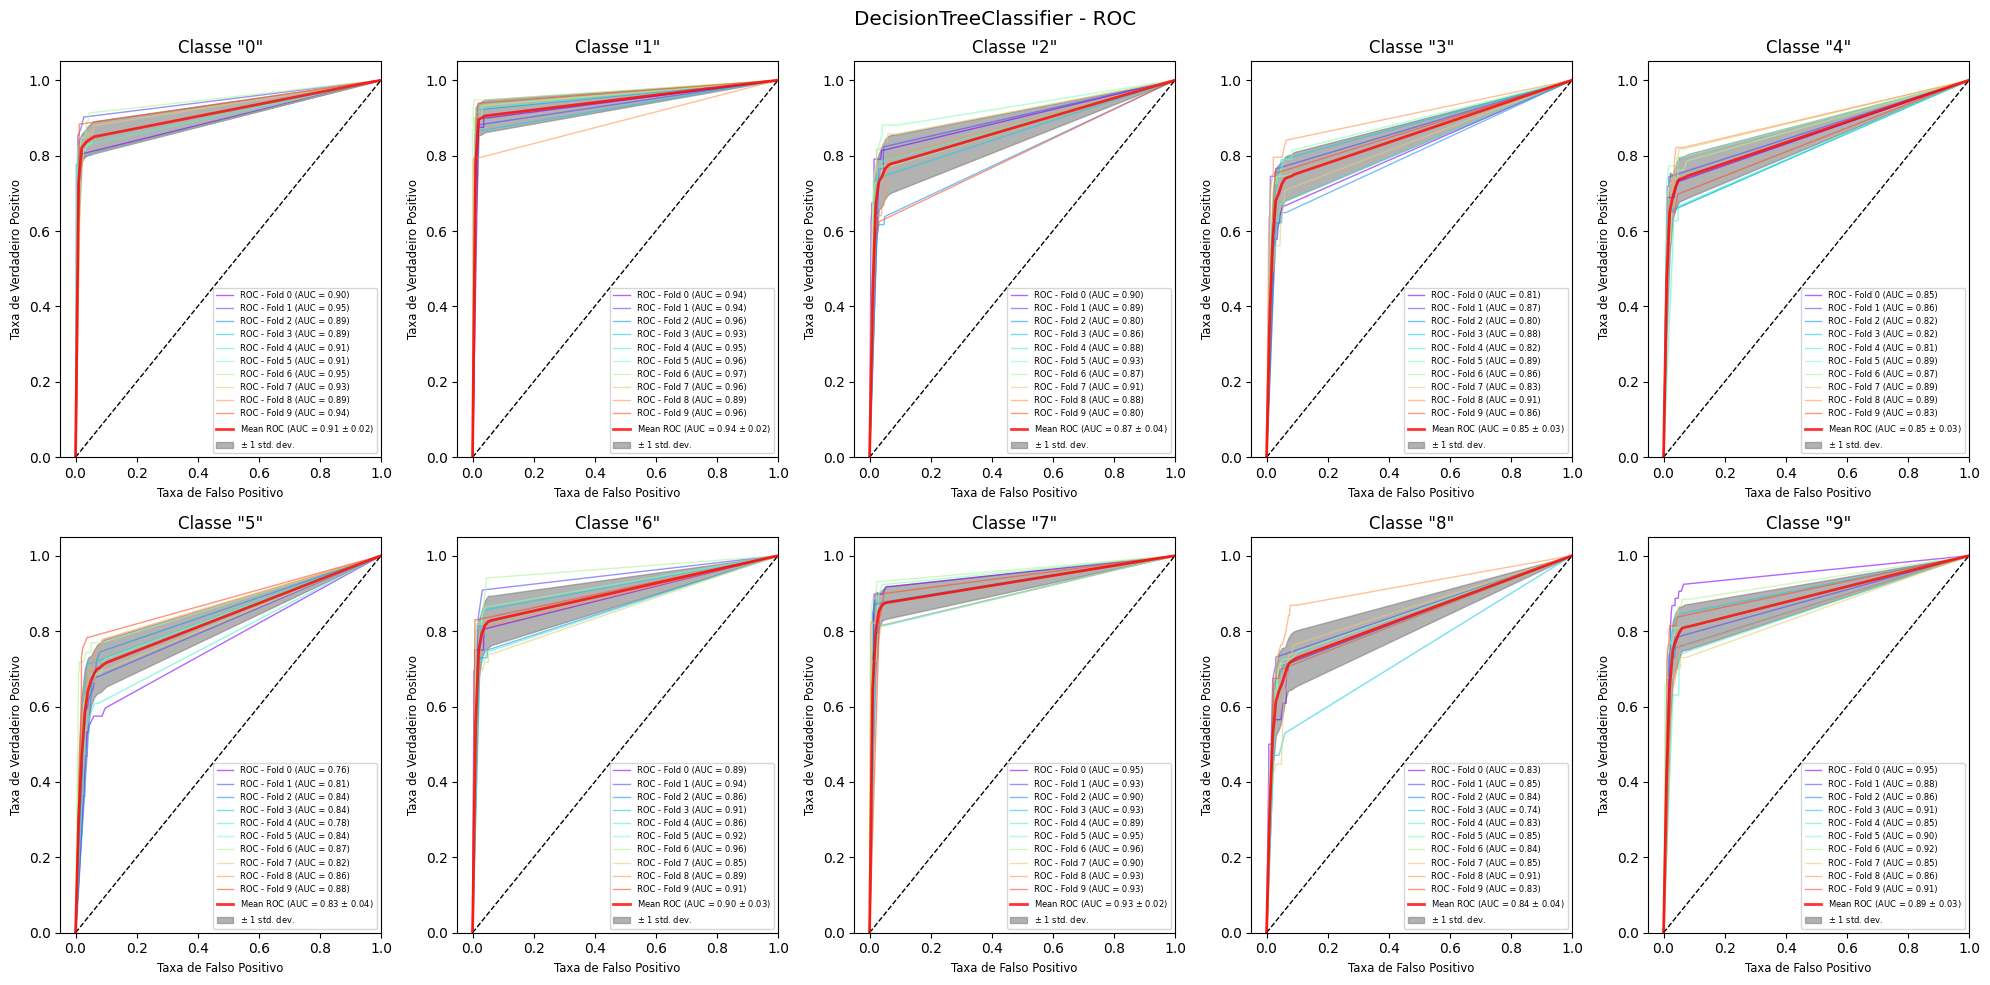

In [6]:
dt_results = Results('DecisionTreeClassifier', dt_acc, dt_f1, dt_cm, dt_roc, '')
dt_results.plot()
dt_results.save()

### GaussianNB

Resumo das métricas do modelo GaussianNB

Accurácia média (desvio): 0.811 (0.022)
F1-Score média (desvio): 0.809 (0.022)


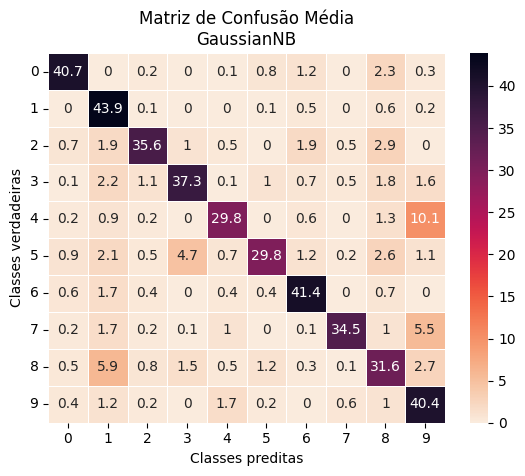

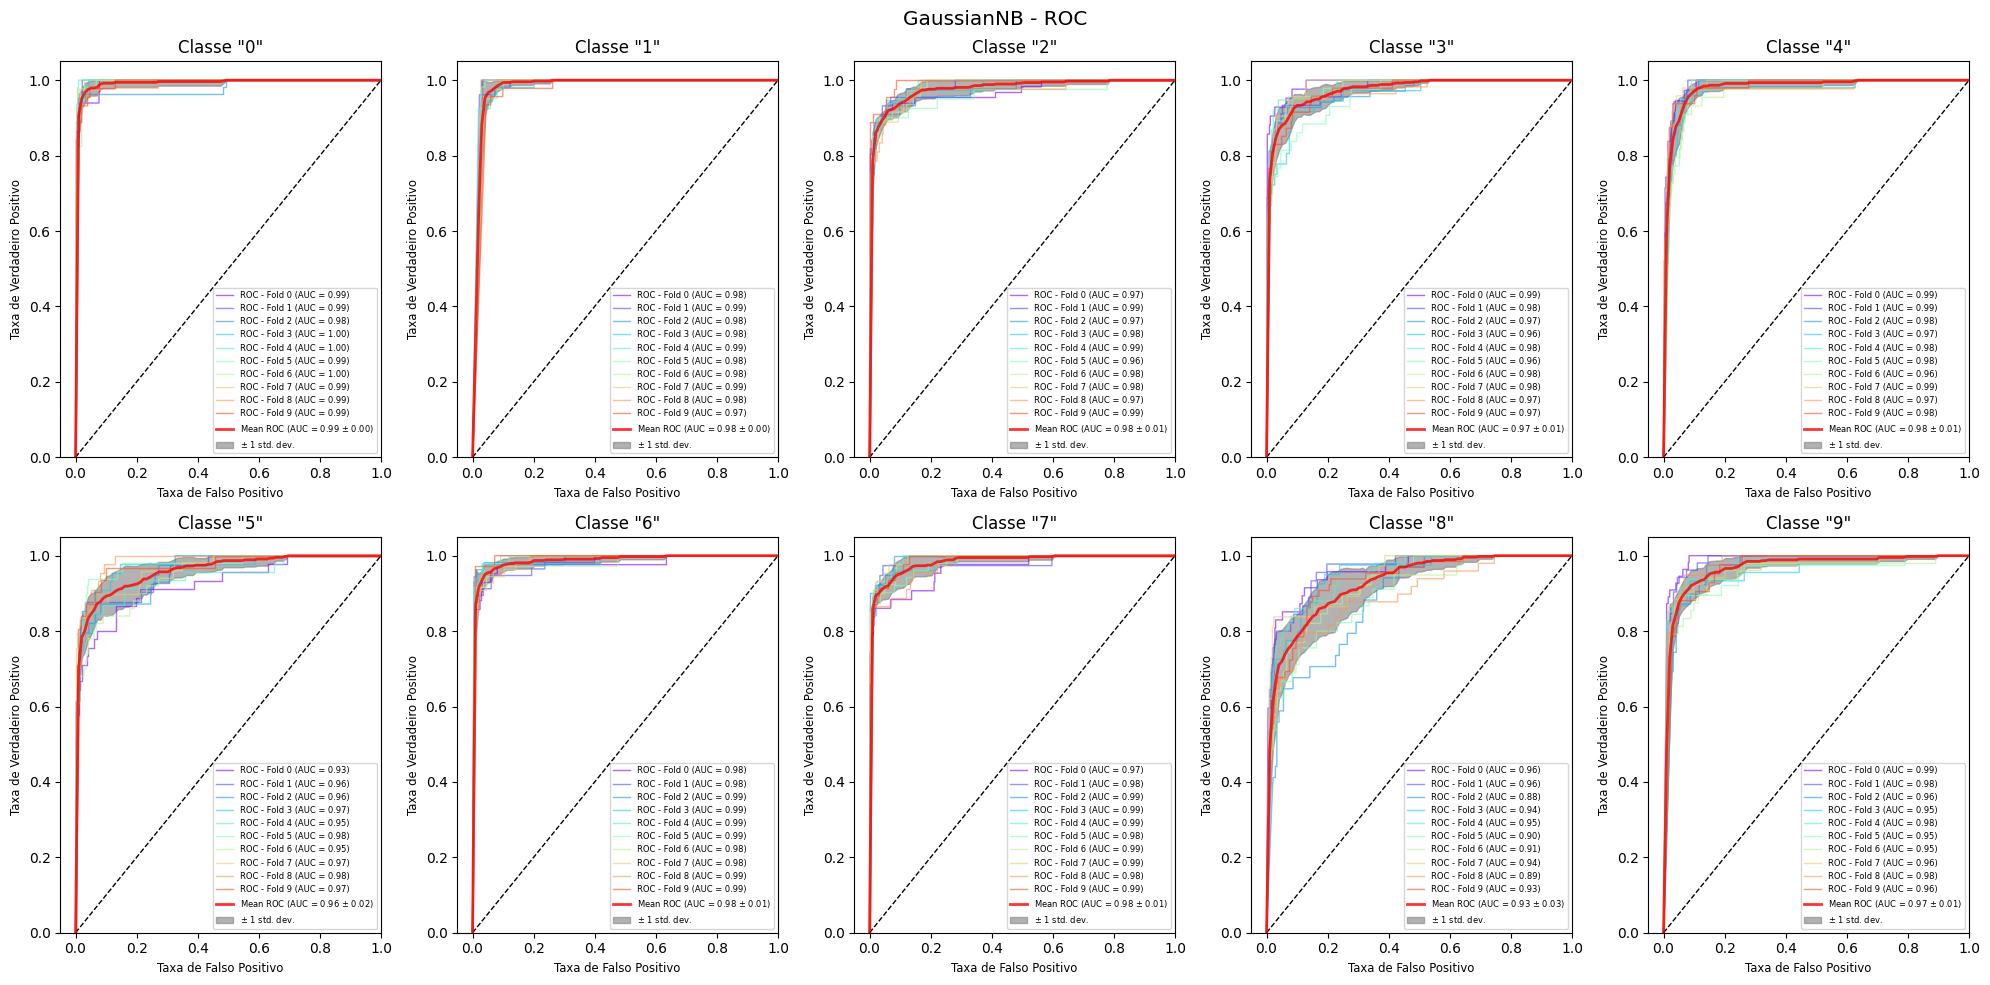

In [7]:
gnb_results = Results('GaussianNB', gnb_acc, gnb_f1, gnb_cm, gnb_roc, '')
gnb_results.plot()
gnb_results.save()

### MultinomialNB

Resumo das métricas do modelo MultinomialNB

Accurácia média (desvio): 0.835 (0.018)
F1-Score média (desvio): 0.834 (0.019)


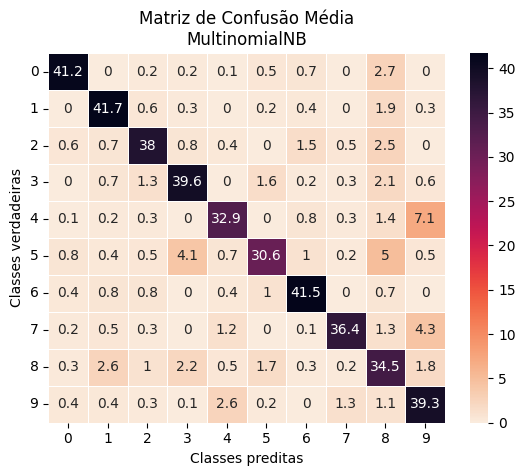

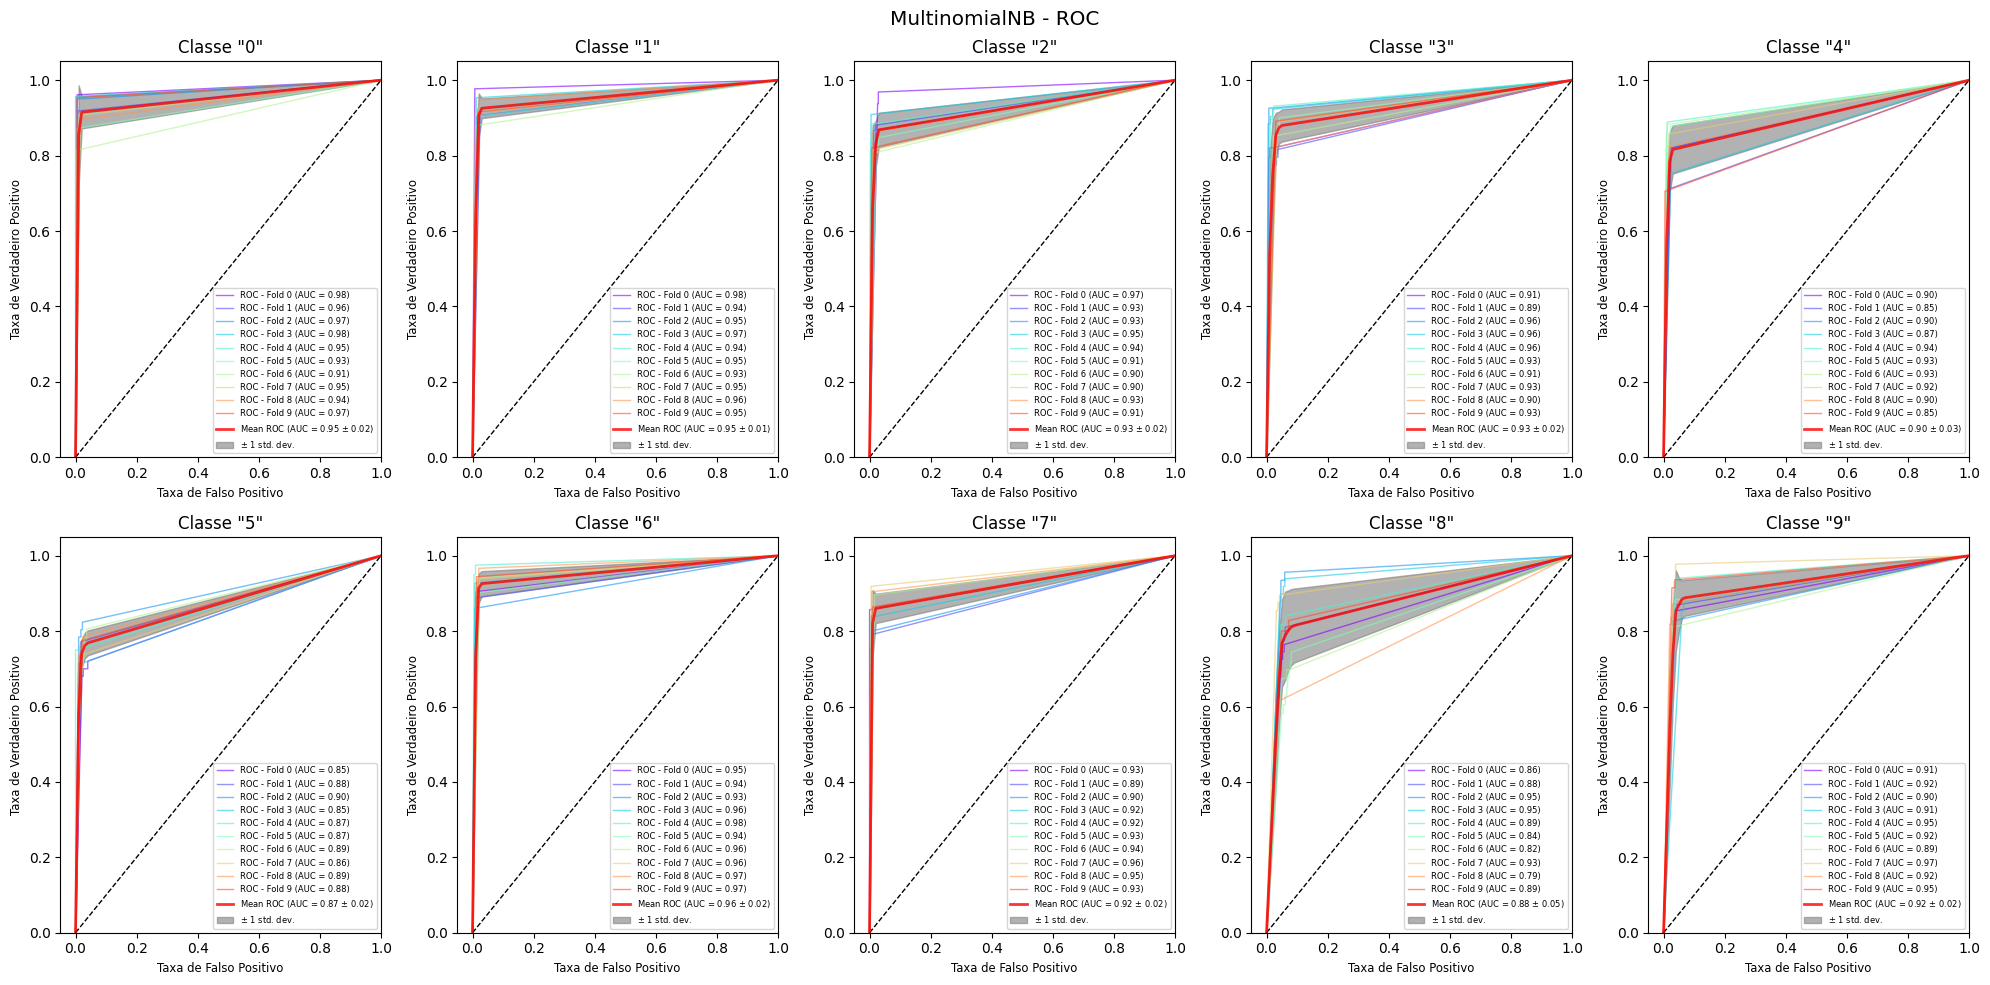

In [8]:
mnb_results = Results('MultinomialNB', mnb_acc, mnb_f1, mnb_cm, mnb_roc, '')
mnb_results.plot()
mnb_results.save()

### MLP

Resumo das métricas do modelo MLP

Accurácia média (desvio): 0.926 (0.015)
F1-Score média (desvio): 0.926 (0.015)


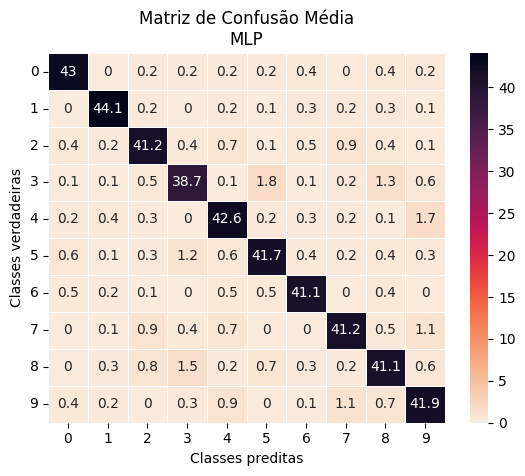

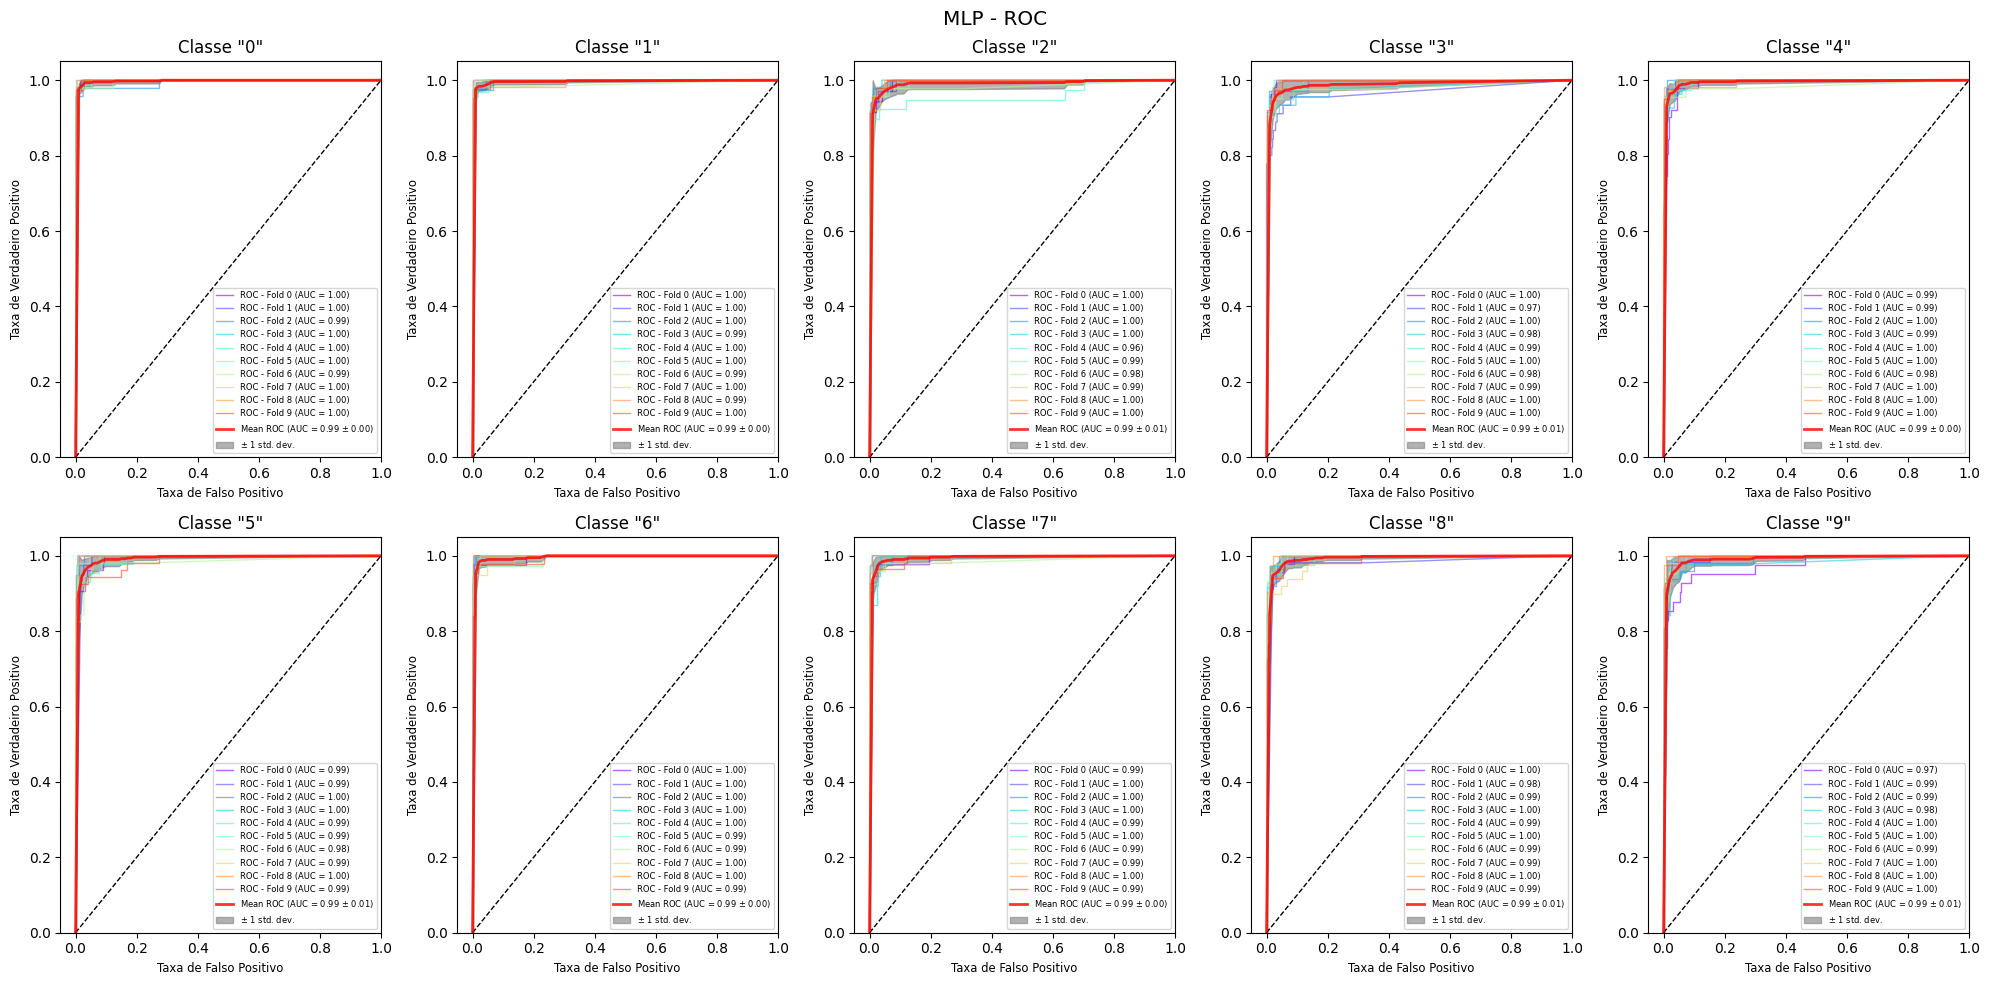

In [9]:
mlp_results = Results('MLP', mlp_acc, mlp_f1, mlp_cm, mlp_roc, '')
mlp_results.plot()
mlp_results.save()

### KNN 

Resumo das métricas do modelo KNN

Accurácia média (desvio): 0.924 (0.013)
F1-Score média (desvio): 0.923 (0.014)


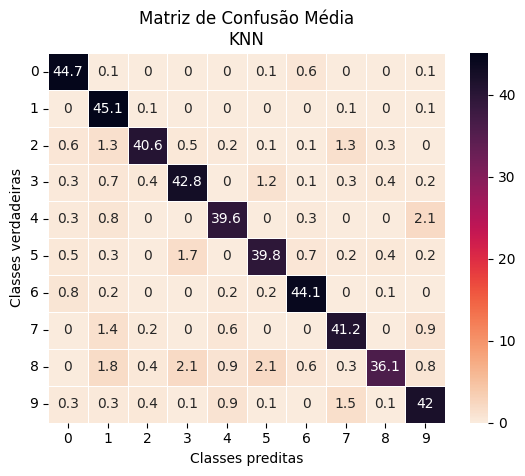

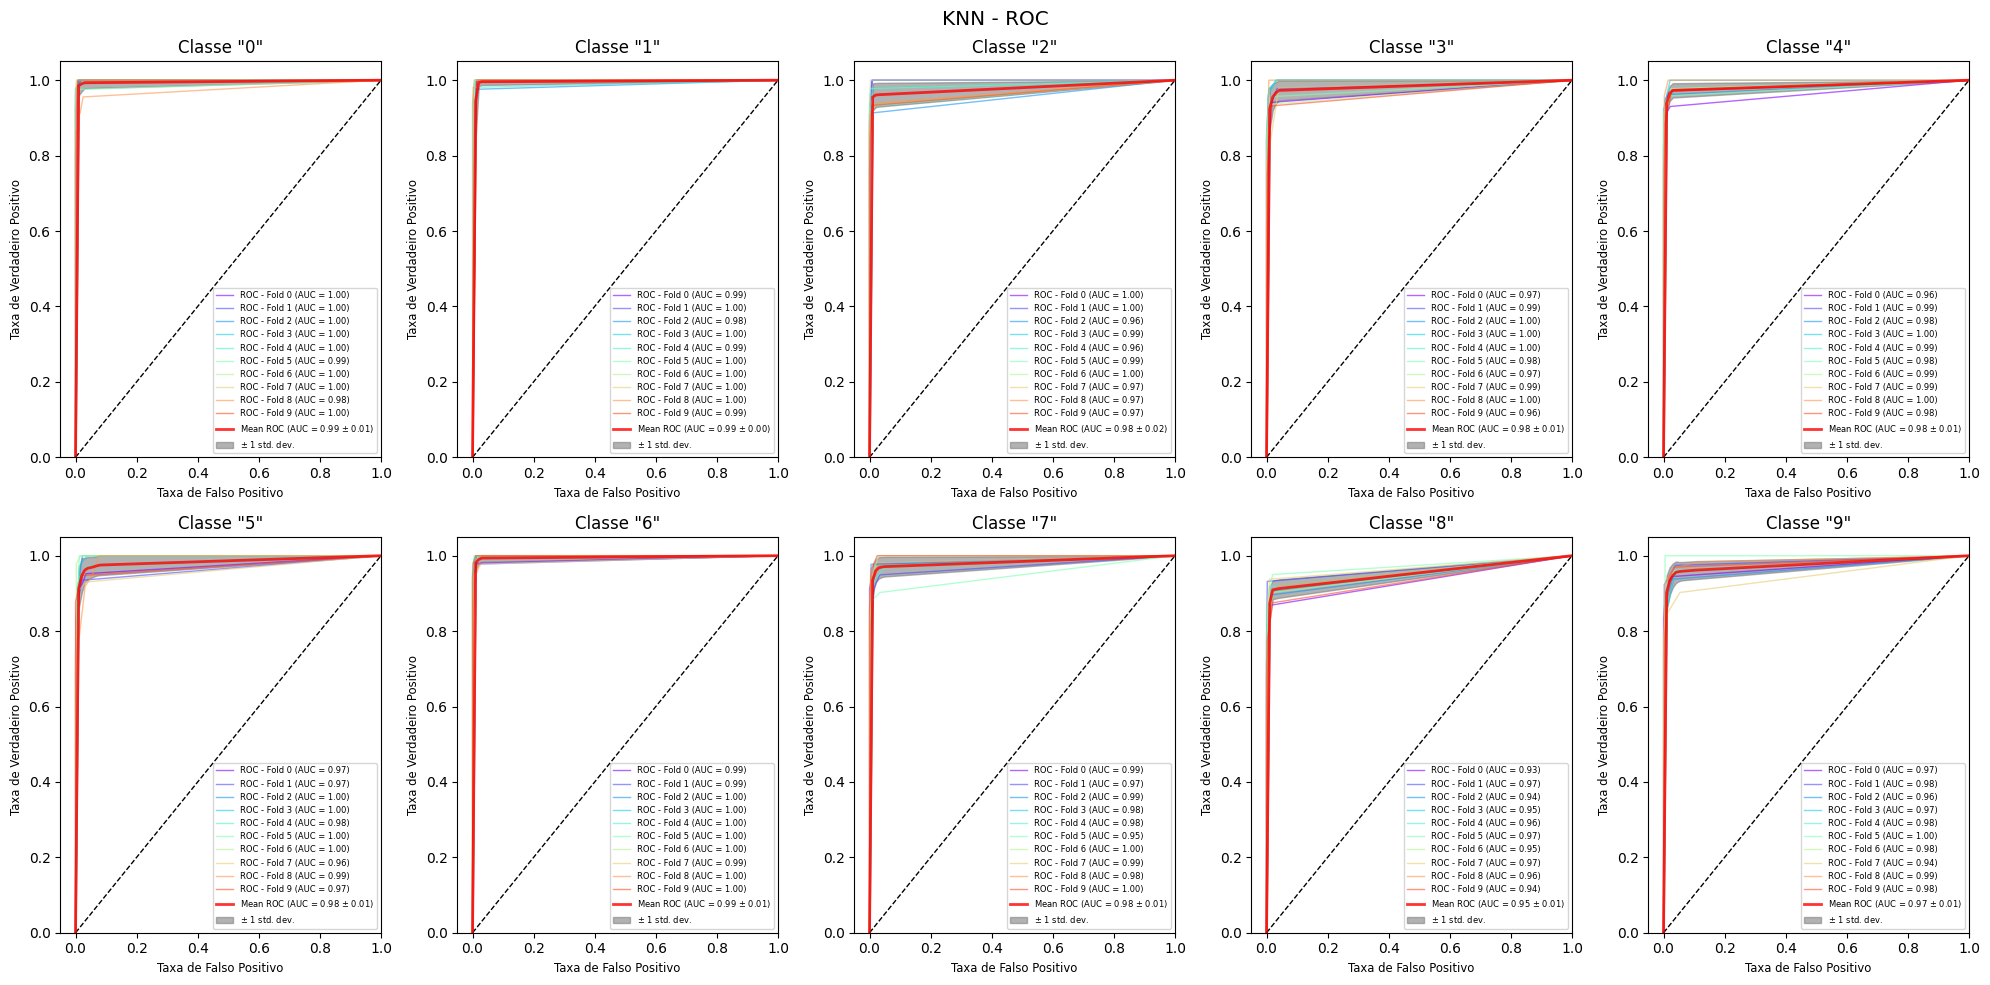

In [10]:
knn_results = Results('KNN', knn_acc, knn_f1, knn_cm, knn_roc, '')
knn_results.plot()
knn_results.save()

### SVC

Resumo das métricas do modelo SVC

Accurácia média (desvio): 0.946 (0.011)
F1-Score média (desvio): 0.945 (0.011)


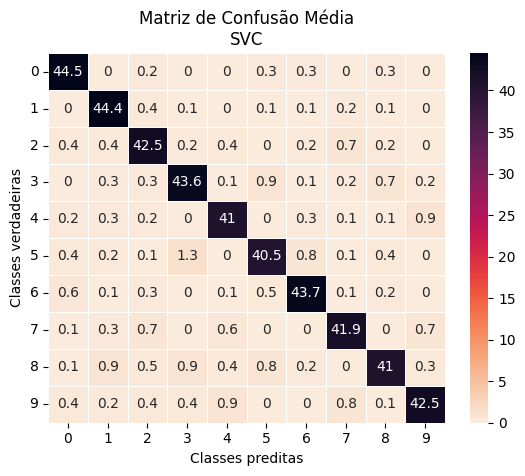

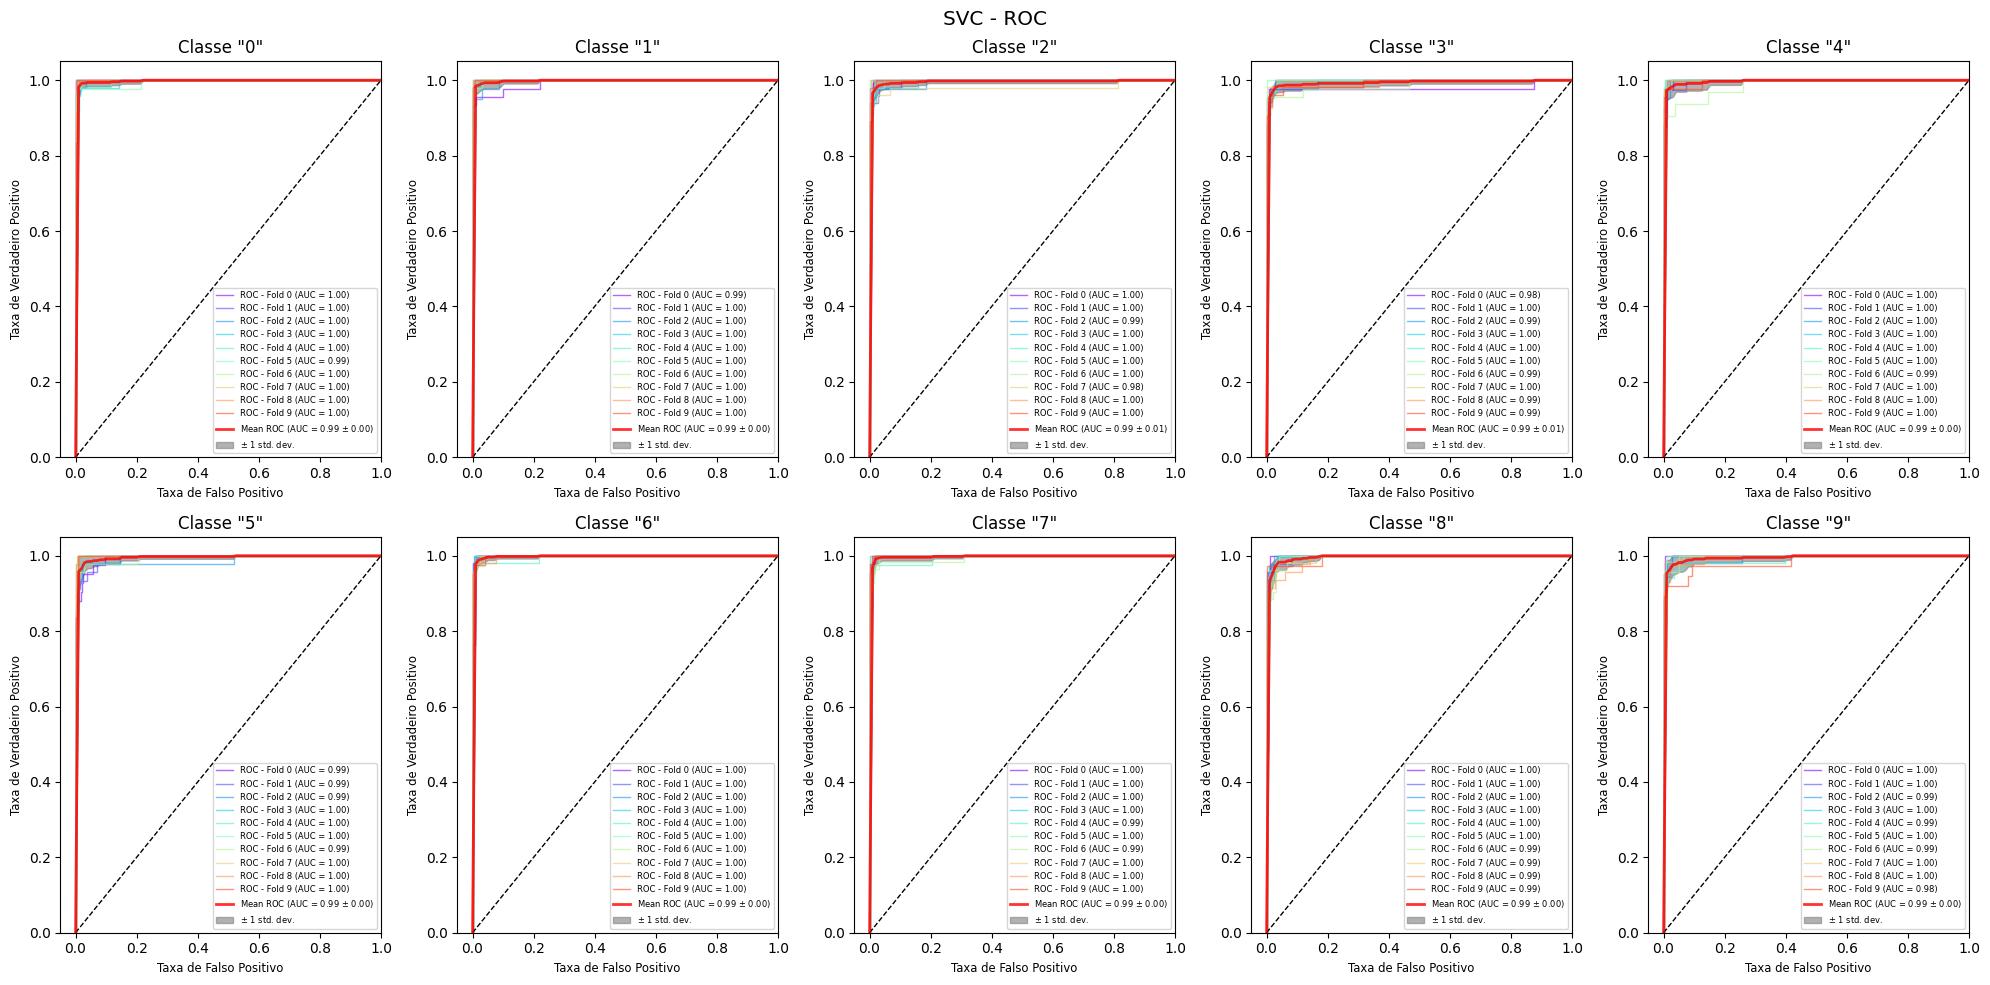

In [11]:
svc_results = Results('SVC', svc_acc, svc_f1, svc_cm, svc_roc, '')
svc_results.plot()
svc_results.save()

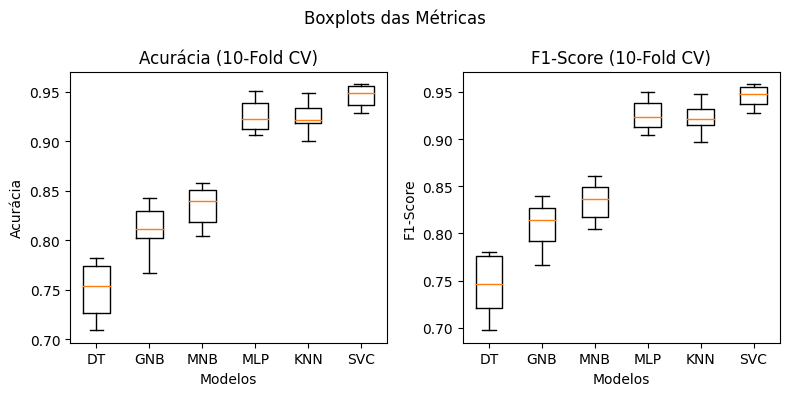

In [30]:
dfs = [acc_df, fscore_df]
metrics = ['Acurácia', 'F1-Score']

plot_box(dfs, metrics)

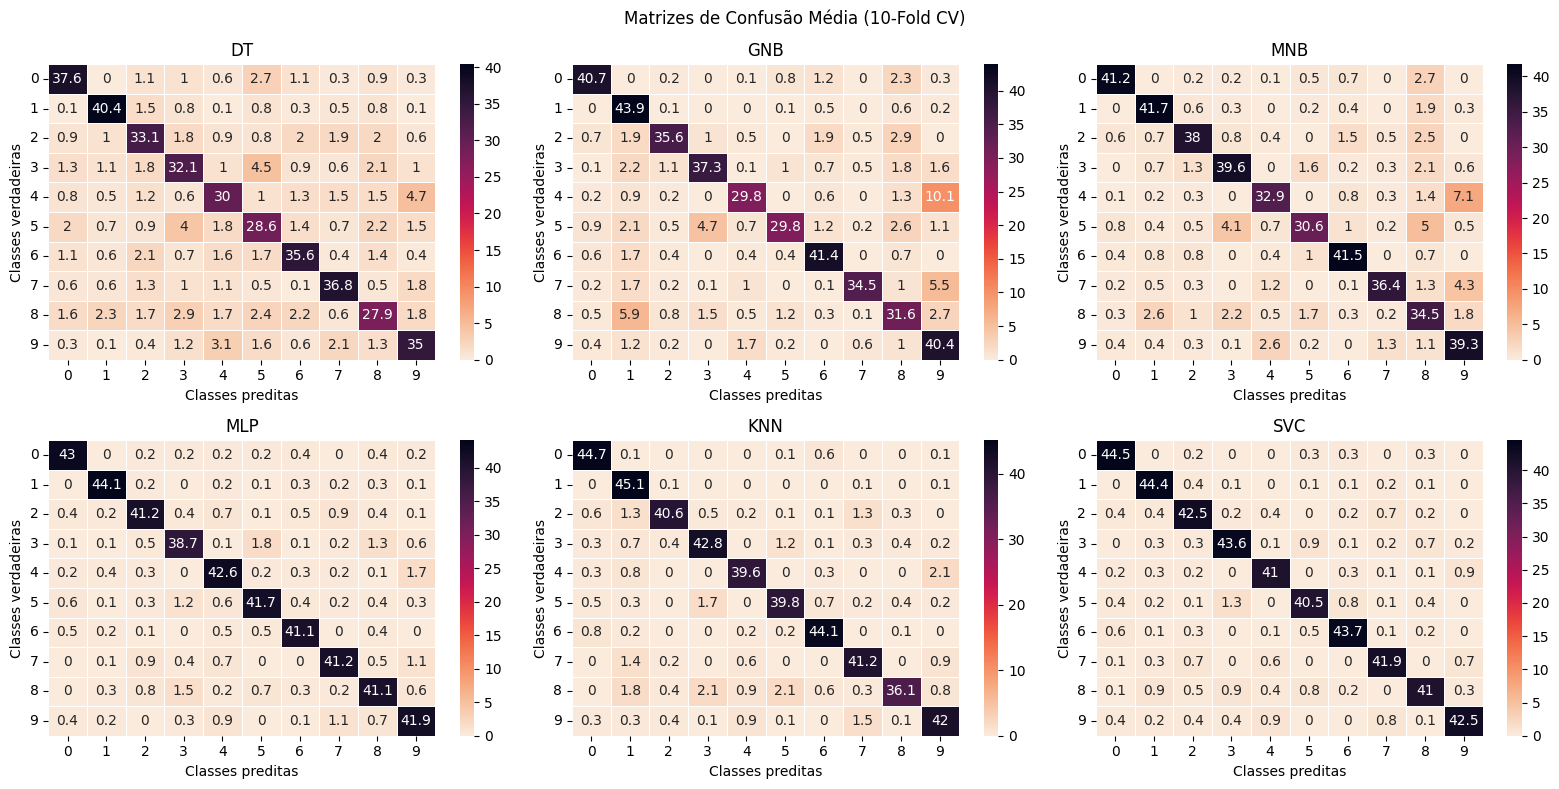

In [31]:
cm_list = [dt_cm, gnb_cm, mnb_cm, mlp_cm, knn_cm, svc_cm]
models_name = ['DT', 'GNB', 'MNB', 'MLP', 'KNN', 'SVC']
plot_cms(cm_list, models_name)